## I- Importation des modules et packages

In [43]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import ipaddress
import joblib as jb
import numpy as np

## II- importation des données et pretraitement

### II-1- importation du datasets

In [3]:
initial_df = pd.read_csv("../datasets/cybersecurity_attacks.csv")

### II-2- analyse descriptive gestion des donnés manquantes

In [4]:
initial_df.head(2)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall


In [5]:
initial_df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [6]:
initial_df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [7]:
#identification des valeurs manquantes
missing_data = initial_df.isnull().sum()
print(missing_data[missing_data > 0])

Malware Indicators    20000
Alerts/Warnings       20067
Proxy Information     19851
Firewall Logs         19961
IDS/IPS Alerts        20050
dtype: int64


In [8]:
initial_df["Malware Indicators"].value_counts()

Malware Indicators
IoC Detected    20000
Name: count, dtype: int64

In [9]:
initial_df["Alerts/Warnings"].value_counts()

Alerts/Warnings
Alert Triggered    19933
Name: count, dtype: int64

In [10]:
initial_df["Proxy Information"].value_counts()

Proxy Information
39.123.165.122     2
150.9.97.135       1
198.80.71.196      1
108.143.243.168    1
211.195.173.251    1
                  ..
205.112.169.158    1
78.192.52.63       1
157.191.153.187    1
205.183.87.116     1
112.169.115.139    1
Name: count, Length: 20148, dtype: int64

In [11]:
initial_df["Firewall Logs"].value_counts()

Firewall Logs
Log Data    20039
Name: count, dtype: int64

In [12]:
initial_df["IDS/IPS Alerts"].value_counts()

IDS/IPS Alerts
Alert Data    19950
Name: count, dtype: int64

In [13]:
initial_df["Timestamp"] = pd.to_datetime(initial_df["Timestamp"])
initial_df["Timestamp"] = initial_df["Timestamp"].dt.hour*3600 + initial_df["Timestamp"].dt.minute*60 + initial_df["Timestamp"].dt.second

In [14]:
initial_df.drop(columns=['Geo-location Data', 'Payload Data', 'Device Information', 'Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 'User Information'], inplace=True)

In [15]:
initial_df["Firewall Logs"] = initial_df["Firewall Logs"].fillna("Not Log")
initial_df["IDS/IPS Alerts"] = initial_df["IDS/IPS Alerts"].fillna("Not Alert")

initial_df['Source IP Address'] = initial_df['Source IP Address'].apply(lambda x: int(ipaddress.ip_address(x)))
initial_df['Destination IP Address'] = initial_df['Destination IP Address'].apply(lambda x: int(ipaddress.ip_address(x)))

In [16]:
#identification des valeurs manquantes
missing_data = initial_df.isnull().sum()
print(missing_data[missing_data > 0])

Series([], dtype: int64)


In [17]:
AttackSignatureEncoder = LabelEncoder()
initial_df['Attack Signature'] = AttackSignatureEncoder.fit_transform(initial_df['Attack Signature'])

AttackSignatureCorrespondances = pd.DataFrame({
    'Original': AttackSignatureEncoder.classes_,
    'Encoded': range(len(AttackSignatureEncoder.classes_))
})
AttackSignatureCorrespondances

,Original,Encoded
0,Known Pattern A,0
1,Known Pattern B,1


In [18]:
ActionTakenEncoder = LabelEncoder()
initial_df['Action Taken'] = ActionTakenEncoder.fit_transform(initial_df['Action Taken'])

ActionTakenCorrespondances = pd.DataFrame({
    'Original': ActionTakenEncoder.classes_,
    'Encoded': range(len(ActionTakenEncoder.classes_))
})
ActionTakenCorrespondances

,Original,Encoded
0,Blocked,0
1,Ignored,1
2,Logged,2


In [19]:
PacketTypeEncoder = LabelEncoder()
initial_df['Packet Type'] = PacketTypeEncoder.fit_transform(initial_df['Packet Type'])

PacketTypeCorrespondances = pd.DataFrame({
    'Original': PacketTypeEncoder.classes_,
    'Encoded': range(len(PacketTypeEncoder.classes_))
})
PacketTypeCorrespondances

,Original,Encoded
0,Control,0
1,Data,1


In [20]:
SeverityLevelEncoder = LabelEncoder()
initial_df['Severity Level'] = SeverityLevelEncoder.fit_transform(initial_df['Severity Level'])

SeverityLevelCorrespondances = pd.DataFrame({
    'Original': SeverityLevelEncoder.classes_,
    'Encoded': range(len(SeverityLevelEncoder.classes_))
})
SeverityLevelCorrespondances

,Original,Encoded
0,High,0
1,Low,1
2,Medium,2


In [21]:
ProtocolEncoder = LabelEncoder()
initial_df['Protocol'] = ProtocolEncoder.fit_transform(initial_df['Protocol'])

ProtocolCorrespondances = pd.DataFrame({
    'Original': ProtocolEncoder.classes_,
    'Encoded': range(len(ProtocolEncoder.classes_))
})
ProtocolCorrespondances

,Original,Encoded
0,ICMP,0
1,TCP,1
2,UDP,2


In [22]:
NetworkSegmentEncoder = LabelEncoder()
initial_df['Network Segment'] = NetworkSegmentEncoder.fit_transform(initial_df['Network Segment'])

NetworkSegmentCorrespondances = pd.DataFrame({
    'Original': NetworkSegmentEncoder.classes_,
    'Encoded': range(len(NetworkSegmentEncoder.classes_))
})
NetworkSegmentCorrespondances

,Original,Encoded
0,Segment A,0
1,Segment B,1
2,Segment C,2


In [23]:
FirewallLogsEncoder = LabelEncoder()
initial_df['Firewall Logs'] = FirewallLogsEncoder.fit_transform(initial_df['Firewall Logs'])

FirewallLogsCorrespondances = pd.DataFrame({
    'Original': FirewallLogsEncoder.classes_,
    'Encoded': range(len(FirewallLogsEncoder.classes_))
})
FirewallLogsCorrespondances

,Original,Encoded
0,Log Data,0
1,Not Log,1


In [24]:
LogSourceEncoder = LabelEncoder()
initial_df['Log Source'] = LogSourceEncoder.fit_transform(initial_df['Log Source'])

LogSourceCorrespondances = pd.DataFrame({
    'Original': LogSourceEncoder.classes_,
    'Encoded': range(len(LogSourceEncoder.classes_))
})
LogSourceCorrespondances

,Original,Encoded
0,Firewall,0
1,Server,1


In [25]:
TrafficTypeEncoder = LabelEncoder()
initial_df['Traffic Type'] = TrafficTypeEncoder.fit_transform(initial_df['Traffic Type'])

TrafficTypeCorrespondances = pd.DataFrame({
    'Original': TrafficTypeEncoder.classes_,
    'Encoded': range(len(TrafficTypeEncoder.classes_))
})
TrafficTypeCorrespondances

,Original,Encoded
0,DNS,0
1,FTP,1
2,HTTP,2


In [26]:
AttackTypeEncoder = LabelEncoder()
initial_df['Attack Type'] = AttackTypeEncoder.fit_transform(initial_df['Attack Type'])

AttackTypeCorrespondances = pd.DataFrame({
    'Original': AttackTypeEncoder.classes_,
    'Encoded': range(len(AttackTypeEncoder.classes_))
})
AttackTypeCorrespondances

,Original,Encoded
0,DDoS,0
1,Intrusion,1
2,Malware,2


In [27]:
initial_df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Anomaly Scores', 'Attack Type',
       'Attack Signature', 'Action Taken', 'Severity Level', 'Network Segment',
       'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [51]:
first_row_json = initial_df.head(1).to_json(orient='records')
first_row_json

'[{"Timestamp":23638,"Source IP Address":1742212876,"Destination IP Address":1409918204,"Source Port":31225,"Destination Port":17616,"Protocol":0,"Packet Length":503,"Packet Type":1,"Traffic Type":2,"Anomaly Scores":28.67,"Attack Type":2,"Attack Signature":1,"Action Taken":2,"Severity Level":1,"Network Segment":0,"Firewall Logs":0,"IDS\\/IPS Alerts":"Not Alert","Log Source":1}]'

In [29]:
Y = initial_df["IDS/IPS Alerts"]
X = initial_df.drop(columns = ["IDS/IPS Alerts"])

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
clf = RandomForestClassifier(max_depth=4, random_state=0)

In [32]:
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [33]:
clf1 = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf1.fit(X_train, Y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

In [34]:
pred = clf.predict(X_test)

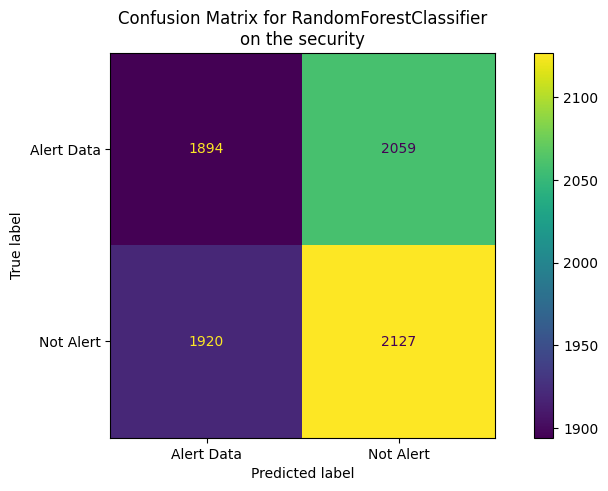

In [36]:
target_names = "IDS/IPS Alerts"
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(Y_test, pred, ax=ax)
_ = ax.set_title(
    f"Confusion Matrix for {clf.__class__.__name__}\non the security"
)

In [37]:
pred1 = clf1.predict(X_test)

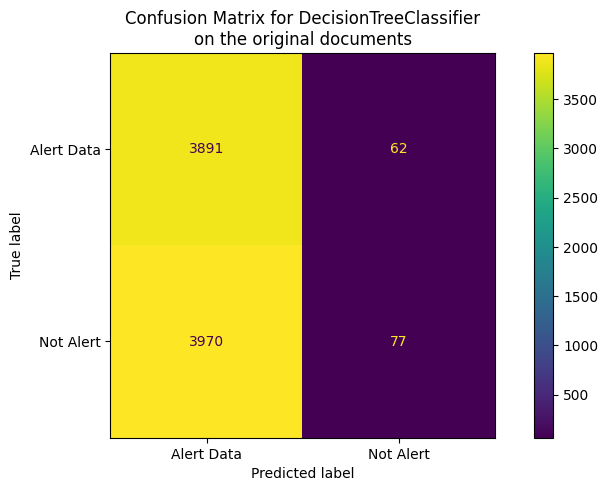

In [38]:
target_names = "IDS/IPS Alerts"
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(Y_test, pred1, ax=ax)
_ = ax.set_title(
    f"Confusion Matrix for {clf1.__class__.__name__}\non the original documents"
)

In [40]:
jb.dump(clf, "modelV1.pkl")

['modelV1.pkl']

In [41]:
jb.dump(clf, "modelV2.pkl")

['modelV2.pkl']

In [45]:
print(len(initial_df.columns))
print(initial_df.columns)


18
Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Anomaly Scores', 'Attack Type',
       'Attack Signature', 'Action Taken', 'Severity Level', 'Network Segment',
       'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')
